# Wilcoxon comparison

In this notebook, we will take a look at the Wilcoxon evaluation technique and how to use it to compare two sets of performances that aim to resemble the performance of two models.

<!-- In this notebook, we will start to evaluate and compare two models, particularly the [K-Nearest Neighbours](/exercises/scikit-learn/KNN.ipynb) and the [Logistic Regression Classifier](../algorithms/logistic-regression-classifier/logistic-regression-classifier.ipynb). 

### Pandas

We will use a Python package, called <tt>pandas</tt> that will be useful to print tables, which are called _dataframes_ and, as we can see from the script, are implemented as dictionaries: the key is the column and its value is a list of elements, which will populate each row of the table
-->

## First scenario



In [1]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns

# create data
dat = pd.DataFrame({
  'Model': ['M1', 'M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M2'],
  'Performance': [0.511, 0.711, 0.611, 0.811, 0.525, 0.655, 0.825, 0.925]
})

print(dat)

  Model  Performance
0    M1        0.511
1    M1        0.711
2    M1        0.611
3    M1        0.811
4    M2        0.525
5    M2        0.655
6    M2        0.825
7    M2        0.925



<!-- The first thing to do is 

Wilocoxon that is scipi stats package. measure differences, compute probability of having switthc M1 M2 M1 .... IN input has perfomrance of model 1.

Alternative hipo is the two sided, interested in both of M1 better than M2 or if the M2 is better than M1. ituations where we can decide just to look at M1 or M2. Correction false, is lika a numerica approximation *out of contex f course -->

In [2]:
# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(dat[dat['Model'] == 'M1']['Performance'], 
                                        dat[dat['Model'] == 'M2']['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction=False)


<!--  -->

Wilcoxon Signed-Rank Test:
p-value: 0.375


<Axes: xlabel='Model', ylabel='Performance'>

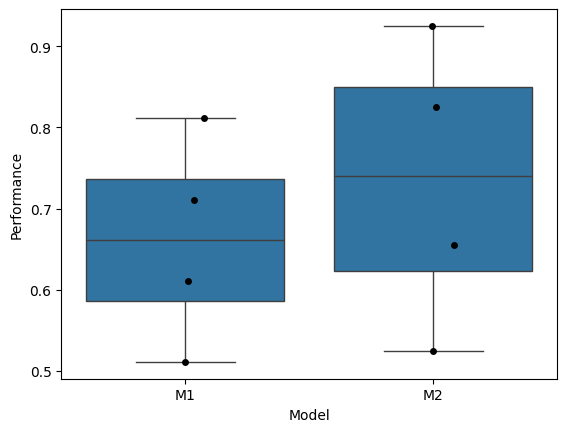

In [3]:
# display test results
print("Wilcoxon Signed-Rank Test:")
#print(f"Statistic: {wilcoxon_stat}")
print(f"p-value: {wilcoxon_pval}")

# plot with statistical results
sns.boxplot(data=dat, x='Model', y='Performance')
sns.stripplot(data=dat, x='Model', y='Performance', color='black', size=5)


## Second scenario



In [4]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns

samples = 10

perf = pd.DataFrame({
  'Model': ['M1'] * samples + ['M2'] * samples,
  'Performance': list(np.random.normal(size=samples)) + list(np.random.normal(size=samples) + 1)
})

print(perf)

   Model  Performance
0     M1     0.184084
1     M1     0.905231
2     M1    -0.145571
3     M1     1.289454
4     M1     0.343017
5     M1     0.993817
6     M1     0.836192
7     M1    -0.431030
8     M1    -1.184687
9     M1     0.433227
10    M2     1.211985
11    M2    -0.110268
12    M2     1.692679
13    M2     1.331928
14    M2     1.327035
15    M2     0.708269
16    M2     0.866117
17    M2     0.720723
18    M2     0.215903
19    M2     1.006071


In [5]:

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(perf[perf['Model'] == 'M1']['Performance'], 
                                        perf[perf['Model'] == 'M2']['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction=False)


Wilcoxon Signed-Rank Test:
Statistic: 9.0
p-value: 0.064453125
Mean Performance for M1: 0.3223734413824498
Mean Performance for M2: 0.8970443275524118


<Axes: xlabel='Model', ylabel='Performance'>

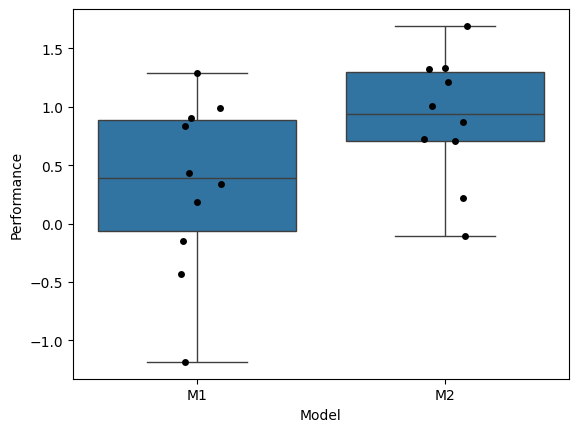

In [6]:
# display test results
print("Wilcoxon Signed-Rank Test:")
print(f"Statistic: {wilcoxon_stat}")
print(f"p-value: {wilcoxon_pval}")

# calculate means
mean_m1 = perf[perf['Model'] == 'M1']['Performance'].mean()
mean_m2 = perf[perf['Model'] == 'M2']['Performance'].mean()

print(f"Mean Performance for M1: {mean_m1}")
print(f"Mean Performance for M2: {mean_m2}")

# plot with statistical results
sns.boxplot(data=perf, x='Model', y='Performance')
sns.stripplot(data=perf, x='Model', y='Performance', color='black', size=5)
